# Convolutional Neural Network (CNN)

In this notebook, we will explore Convolutional Neural Network on the MNIST dataset using Keras. Convolutional Neural Networks are well suited for dealing with images. The MNIST dataset is a dataset of 60,000 28x28 grayscale images of handwritten digits, from 0 to 9, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

We first import all the requiered libraries.

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

Now we are going load our data and to split it into training and testing sets. Our features will be the images of the handwritten digits and the labels will be the number of the digit they correspond to.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Our images are 2D images of 28x28 pixels and therefore, we need to shape them accordingly.
Depending on the data format Keras is set up for, this will either 1x28x28 or 28x28x1, so we need to take this into consideration. The "1" refers to a single color channel, grayscale.

In [7]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = x_train.reshape(x_train.shape[0], 1, 28, 28)
    test_images = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = x_train.reshape(x_train.shape[0], 28, 28, 1)
    test_images = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Now we need to convert our train and test labels to be categorical in one-hot format - as no ordinal relationship exists between labels exist -. So for instace, the number 5 will be represented as (0,0,0,0,0,1,0,0,0,0).

In [12]:
train_labels = tensorflow.keras.utils.to_categorical(y_train, 10)
test_labels = tensorflow.keras.utils.to_categorical(y_test, 10)

Let's check how some images and their labels look like.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


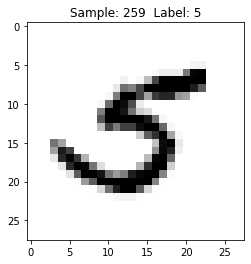

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


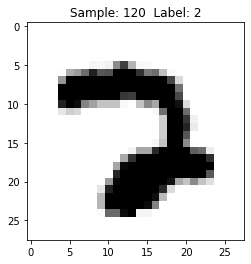

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


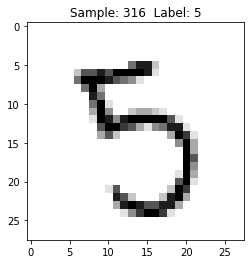

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


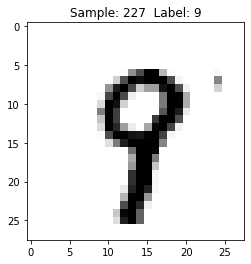

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


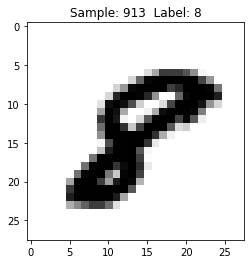

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


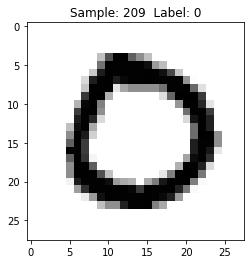

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


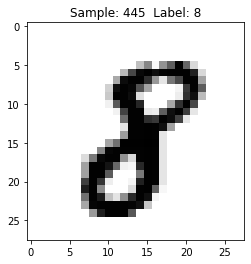

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


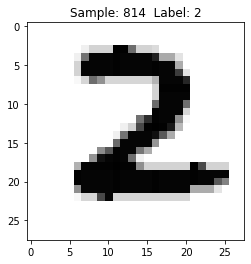

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


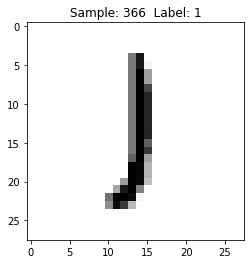

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


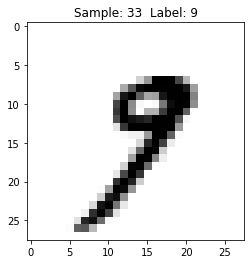

In [17]:
import matplotlib.pyplot as plt

def display_sample(numSample):
    print(train_labels[numSample])  
    label = train_labels[numSample].argmax(axis=0)
    image = train_images[numSample].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (numSample, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


import random

r = list(range(1000))
random.shuffle(r)
count = 0
for i in r:
    display_sample(i)
    count +=1
    if count == 10:
        break

We are now going to set up a convolutional neural network.

First, we use a 2D convolution of the image that will take 32 windows of size 3 by 3 of each image.

Then, we use a second convolution on top of that with 64 windows of size 3 by 3

Next, we apply a MaxPooling2D layer that downsamples the input representation by taking the maximum value over the 2 by 2 window for each dimension along the features axis.

After that, we use a dropout filter in order to prevent overfitting.

Then, we flatten the results to one dimension and feed that into a hidden, flat layer of 128 units.

We apply dropout again to further prevent overfitting.

Finally, we feed that into our final 10 units. Softmax will make the decision to choose the output of our classification

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

We choose categorical_crossentropy as our loss function and RMSProp optimizer as suggested in the Keras documentation.

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

Now we are goin to train our model in a CPU although it would be great if we could take advantage of a GPU, as this takes a long time to run.

In [9]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=2, validation_data=(x_train, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 70s - loss: 0.1818 - accuracy: 0.9457 - val_loss: 0.0434 - val_accuracy: 0.9861
Epoch 2/10
60000/60000 - 66s - loss: 0.0769 - accuracy: 0.9768 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 3/10
60000/60000 - 67s - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0328 - val_accuracy: 0.9904
Epoch 4/10
60000/60000 - 66s - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 5/10
60000/60000 - 67s - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0321 - val_accuracy: 0.9907
Epoch 6/10
60000/60000 - 66s - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 7/10
60000/60000 - 67s - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 8/10
60000/60000 - 66s - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.0301 - val_accuracy: 0.9906
Epoch 9/10
60000/60000 - 67s - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0340 - val_accuracy: 0.9908
Epoch

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034441117036675316
Test accuracy: 0.9908
